# Module 4 Spatial Clustering

In [1]:
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = geopandas.read_file('data/berlin-districts.geojson')

In [ ]:
df.head()

## Medium Price Distribution

In [ ]:
import seaborn as sns
sns.distplot(df['median_price'])

## Spatial Distribution of Medium Price

In [ ]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_price', legend=True, ax=ax)

## Global Clustering

In [ ]:
y = df['median_price']
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

## Agglomerative Clustering

In [ ]:
rook_graph = lp.weights.Rook.from_dataframe(df)

In [15]:
import pandas as pd
import shapely.geometry as shp
import geopandas as gpd
import numpy as np

listings = pd.read_csv('./data/berlin-listings.csv.gz')
listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4269'}
listings = listings.to_crs(epsg=3857)

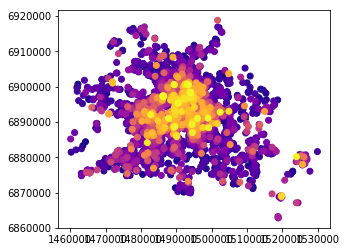

In [12]:
listings.sort_values('price').plot('price', cmap='plasma')

In [16]:
import sklearn.cluster as skc
priceclusters = skc.AgglomerativeClustering(n_clusters=3).fit(df[['median_price']])

In [17]:
coordinates = listings['geometry'].apply(lambda p: np.hstack(p.xy)).values
coordinates = np.vstack(coordinates)

In [18]:
clusterer = skc.DBSCAN(eps=1000).fit(coordinates)

In [19]:
nclusters = clusterer.p

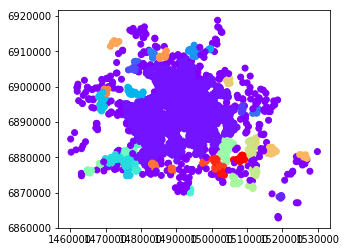

In [20]:
listings.assign(labels=clusterer.labels_).plot('labels', k=nclusters, cmap='rainbow')